In [1]:
import numpy as np
import pandas as pd
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [2]:
lottery = np.array([1,1,0,0,0,0,0,0,0,0])
lottery

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [3]:
sum(lottery) / len(lottery)

0.2

In [4]:
np.random.choice(lottery, size=1, replace=True)

array([0])

In [5]:
print(np.random.choice(lottery, size=1, replace=True))
print(np.random.choice(lottery, size=1, replace=True))
print(np.random.choice(lottery, size=1, replace=True))

[0]
[0]
[1]


In [6]:
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))

[0 1 1 0 1 1 0 0 1 0]
[0 0 0 0 0 0 1 1 0 1]
[0 0 0 0 0 1 0 0 0 0]


In [7]:
np.random.seed(1)
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))

[0 0 0 0 1 1 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 1]


In [8]:
np.random.seed(1)
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))
print(np.random.choice(lottery, size=10, replace=True))

[0 0 0 0 1 1 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 1]


In [9]:
n_trial = 10_000
binomial_result_array = np.zeros(n_trial)

np.random.seed(1)
for i in range(0, n_trial):
    sample = np.random.choice(lottery, size=10, replace=True)
    binomial_result_array[i] = np.sum(sample) # records the number of won games

In [30]:
s = np.arange(1,6,1)
probs = stats.binom.pmf(k=s, n=100, p=0.000000122773804)

probs_df = pd.DataFrame({
    's' : s,
    'prob' : probs
})

probs_df

,s,prob
0,1,1.227723e-05
1,2,7.461247e-11
2,3,2.992416e-16
3,4,8.909216e-22
4,5,2.100131e-27


In [37]:
# 확률이 0.000000122773804 인 복권을 10장씩 사고 5번씩 시행한 결과
result = stats.binom.rvs(n=10, p=0.000000122773804, size=1_000_000)
sum(result)

1

In [11]:
binomial_result_array[0:10]

array([3., 0., 3., 2., 3., 1., 0., 2., 3., 0.])

In [13]:
np.histogram(binomial_result_array, bins=np.arange(0, 11, 1), density=True)

(array([1.118e-01, 2.711e-01, 2.992e-01, 1.977e-01, 8.890e-02, 2.430e-02,
        5.800e-03, 1.100e-03, 1.000e-04, 0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

<Axes: ylabel='Density'>

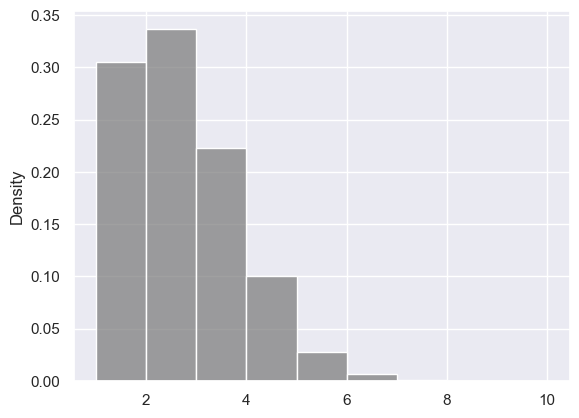

In [14]:
sns.histplot(binomial_result_array, bins=np.arange(1, 11, 1), stat='density', color='gray')

In [17]:
# 두번만 앞면이 1일 확률
round(stats.binom.pmf(k=1, n=2, p=0.5), 3)

0.5

In [18]:
# 확률이 P 인 시행을 N 번했을때 모두 K 일 확률
round(stats.binom.pmf(k=0, n=10, p=0.2), 3)

0.107

In [19]:
n_success = np.arange(0, 11, 1)
probs = stats.binom.pmf(k=n_success, n=10, p=0.2)

probs_df = pd.DataFrame({
    'n_success' : n_success,
    'probs': probs,
})

probs_df

,n_success,probs
0,0,1.073742e-01
1,1,2.684355e-01
2,2,3.019899e-01
3,3,2.013266e-01
4,4,8.808038e-02
5,5,2.642412e-02
6,6,5.505024e-03
7,7,7.864320e-04
8,8,7.372800e-05
9,9,4.096000e-06


<Axes: ylabel='Density'>

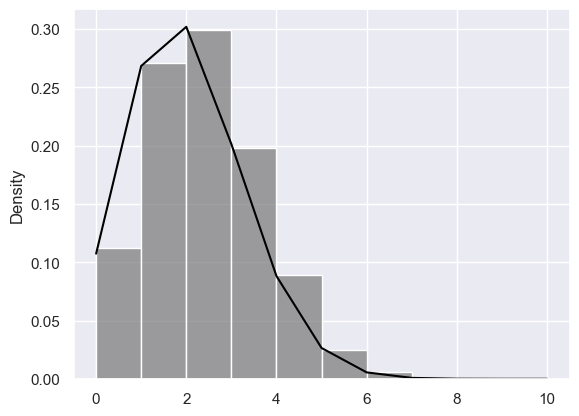

In [21]:
sns.histplot(binomial_result_array, bins=np.arange(0, 11, 1), stat='density', color='gray')
sns.lineplot(x=n_success, y=probs, data=probs_df, color='black')